# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 12</span>
Luca Maria Colombo Gomez - Matr: 934049

### Exercise 1

Keeping all the other parameters fixed, i trained the NN using Adam, RMSprop and Adagrad optimizers, studyng the accuracy and loss value in both training and validation datasets.

In [4]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

In [27]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28)
Y_train shape: (60000,)

60000 train samples
10000 test samples


In [29]:
# reshape data, it could depend on Keras backend
X_train = X_train.reshape(X_train.shape[0], img_rows*img_cols)
X_test = X_test.reshape(X_test.shape[0], img_rows*img_cols)

# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255
Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)

In [30]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# import the optimizers model to test
from keras.optimizers import Adam, RMSprop, Adagrad, Adadelta, Adamax, Nadam

def create_DNN():
    # instantiate model
    model = Sequential()
    # add a dense all-to-all relu layer
    model.add(Dense(400,input_shape=(img_rows*img_cols,), activation='relu'))
    # add a dense all-to-all relu layer
    model.add(Dense(100, activation='relu'))
    # apply dropout with rate 0.5
    model.add(Dropout(0.5))
    # soft-max layer
    model.add(Dense(num_classes, activation='softmax'))
    
    return model

def compile_model(opt):
    # create the model
    model=create_DNN()
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer=opt,
                  metrics=['accuracy'])
    return model

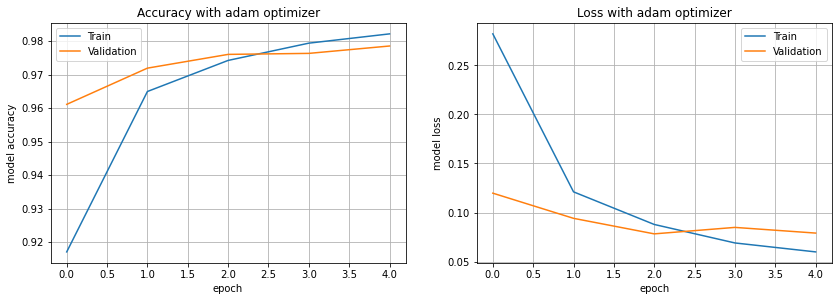

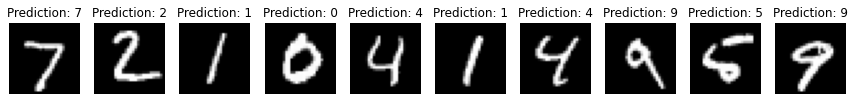

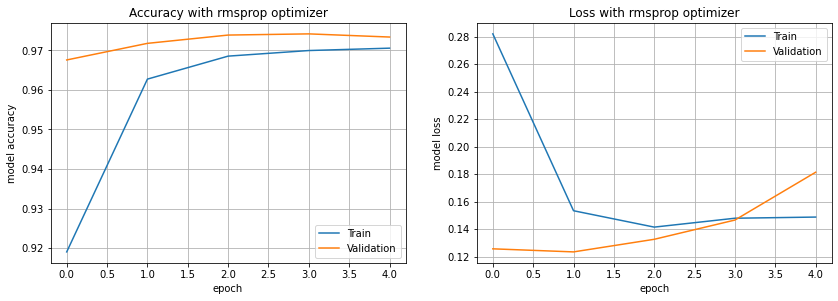

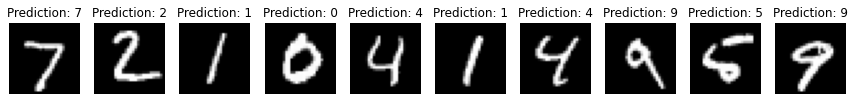

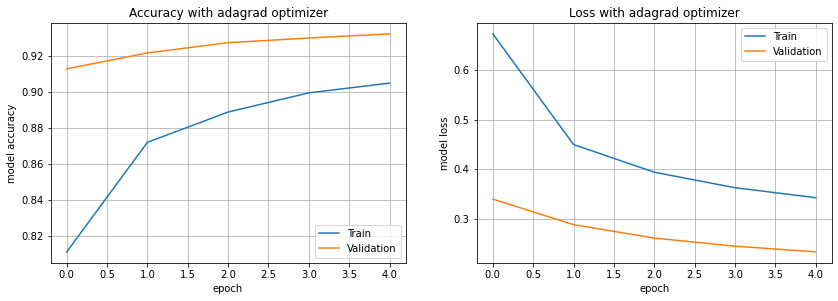

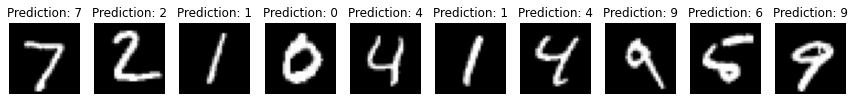

In [31]:
# training parameters
batch_size = 32
epochs = 5
optimizers = optimizers = ['adam','rmsprop', 'adagrad']

row=len(optimizers)
col=2
index = 1


for opt in optimizers:
    # create the deep neural net
    model_DNN = compile_model(opt)

    # train DNN and store training info in history
    history = model_DNN.fit(X_train, Y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=0,
              validation_data=(X_test, Y_test))
    plt.figure(figsize=(7*col, 5*row))

    plt.subplot(row, col, index)
    plt.plot(history.history['accuracy'],label="Train")
    plt.plot(history.history['val_accuracy'],label="Validation")
    plt.title('Accuracy with '+str(opt)+' optimizer')
    plt.ylabel('model accuracy')
    plt.xlabel('epoch')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(row, col, index+1)
    plt.plot(history.history['loss'],label="Train")
    plt.plot(history.history['val_loss'],label="Validation")
    plt.title('Loss with '+str(opt)+' optimizer')
    plt.ylabel('model loss')
    plt.xlabel('epoch')
    plt.legend()
    plt.grid(True)

    plt.show()
    
    predictions = model_DNN.predict(X_test)
    X_test_new = X_test.reshape(X_test.shape[0], img_rows, img_cols,1)

    plt.figure(figsize=(15, 15)) 
    for j in range(10):    
        ax = plt.subplot(2, 10, j + 1)    
        plt.imshow(X_test_new[j, :, :, 0], cmap='gray')    
        plt.title("Prediction: {}".format(np.argmax(predictions[j])))    
        plt.axis('off') 
    plt.show()
    
    index += 2

All the optimizers are able to reach an accuracy of at least $97\%$, with Adam giving the best results.
The loss function seeems to increase at the end, sign that further epochs may result in overfitting, that should be avoided.

The RMSprop optimizers also has pretty high and stable accuracy at the beginning for the validation dataset, but the loss function of the validation dataset suggest that the DNN may be overfitting already.

The adagrad optimizers seems to be the slowest one, with both accuracy and loss function still increasing and decreasing respectiviley, indicating that the results could benefit from longer training.

### Exercise 2

I added some different layers in the definition of my NN, and then evaluated the performance as the previous exercise

In [36]:
# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

if keras.backend.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
    
# cast floats to single precision
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# rescale data in interval [0,1]
X_train /= 255
X_test /= 255

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_test = keras.utils.to_categorical(Y_test, num_classes)
    
print('X_train shape:', X_train.shape)
print('Y_train shape:', Y_train.shape)
print()
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
Y_train shape: (60000, 10)

60000 train samples
10000 test samples


In [39]:
#import some more layers type
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

def create_CNN():
    model = Sequential()
    # add first convolutional layer with 10 filters (dimensionality of output space)
    model.add(Conv2D(10, kernel_size=(5, 5), activation='relu', input_shape=input_shape))
    
    # do some simple features pooling 
    model.add(MaxPooling2D(pool_size=2))
    model.add(Conv2D(5, kernel_size=(5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=2))
    
    # flatten to input into the dense layers
    model.add(Flatten())
    
    model.add(Dense(120, activation='relu'))
    model.add(Dense(60, activation='relu'))
    # last layer return to the requested size
    model.add(Dense(10, activation='softmax'))
    
    # compile the model
    model.compile(loss=keras.losses.categorical_crossentropy,
                  optimizer='Adam',
                  metrics=['accuracy'])
    return model

In [40]:
# training parameters
batch_size = 32
epochs = 5

# create the deep conv net
model_CNN=create_CNN()

# train 
history_cnn = model_CNN.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))

Epoch 1/5
1875/1875 [==============================] - 124s 66ms/step - loss: 0.2572 - accuracy: 0.9212 - val_loss: 0.1357 - val_accuracy: 0.9582
Epoch 2/5
1875/1875 [==============================] - 121s 65ms/step - loss: 0.1031 - accuracy: 0.9682 - val_loss: 0.0891 - val_accuracy: 0.9717
Epoch 3/5
1875/1875 [==============================] - 124s 66ms/step - loss: 0.0798 - accuracy: 0.9743 - val_loss: 0.0749 - val_accuracy: 0.9754
Epoch 4/5
1875/1875 [==============================] - 119s 64ms/step - loss: 0.0694 - accuracy: 0.9785 - val_loss: 0.0633 - val_accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0593 - accuracy: 0.9814 - val_loss: 0.0657 - val_accuracy: 0.9787


313/313 [==============================] - 1s 4ms/step - loss: 0.0657 - accuracy: 0.9787

Test loss: 0.06569188088178635
Test accuracy: 0.9786999821662903


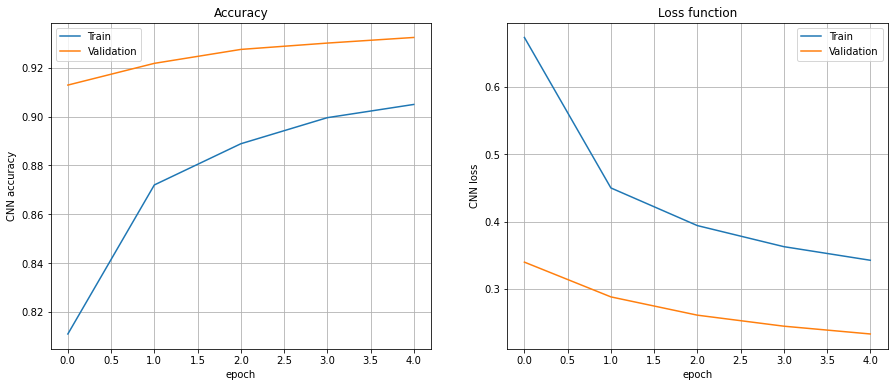

In [43]:
# evaluate model
score = model_CNN.evaluate(X_test, Y_test, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

plt.figure(index, figsize = (15, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'],label="Train")
plt.plot(history.history['val_accuracy'],label="Validation")
plt.title("Accuracy")
plt.ylabel('CNN accuracy')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)

# summarize history for loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'],label="Train")
plt.plot(history.history['val_loss'],label="Validation")
plt.title("Loss function")
plt.ylabel('CNN loss')
plt.xlabel('epoch')
plt.legend()
plt.grid(True)

### Exercise 3

Using ```gimp```, I've wrote myself a picture of each of the 10 digits, to see if the NN it's able to recognize my own handwriting. The digits file are saved in the ```digits``` folder. 

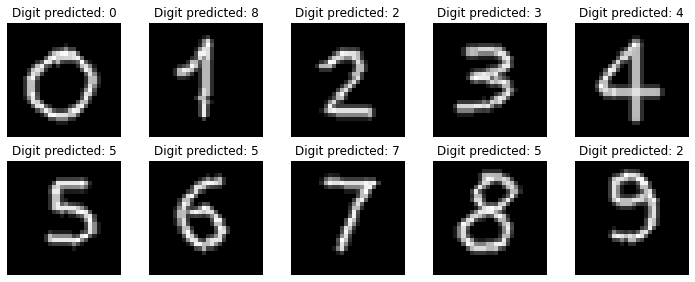

In [42]:
from PIL import Image
import os

igits = [str(d) for d in range(10)]
img_width = 28
img_height = 28

fig, axes = plt.subplots(2, 5,figsize = (10,4))
axes = axes.flatten()
digits = [str(d) for d in range(10)]

for d_count, digit in zip(range(10), digits):
    filename = "digits/"+str(digit)+".png"
    digit_image = Image.open(filename).convert('L')

    ydim, xdim = digit_image.size
    pix = digit_image.load()
    data = np.zeros((xdim, ydim))
    
    for j in range(ydim):
        for i in range(xdim):
            data[i,j] = pix[j,i]

    data /= 255
    axes[d_count].imshow(data, cmap = "gray")

    if keras.backend.image_data_format() == "channels_first":
        data = data.reshape(1, 1, img_width, img_height)
    else:
        data = data.reshape(1, img_width, img_height, 1)

    axes[d_count].axis("off")
    axes[d_count].set_title("Digit predicted: " + str(np.argmax(model_CNN.predict(data))))

fig.tight_layout()
plt.show()